# Driving Pattern Profiling and Classification

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### loading data

In [2]:
data = pd.read_csv("Driving Data(KIA SOUL)_(150728-160714)_(10 Drivers_A-J).csv")

In [3]:
data

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,Fuel_Pressure,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Flywheel_torque_(after_torque_interventions),Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,Flywheel_torque,Torque_scaling_factor(standardization),Standard_Torque_Ratio,Requested_spark_retard_angle_from_TCU,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Target_engine_speed_used_in_lock-up_module,Glow_plug_control_request,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Wheel_velocity_front_left-hand,Wheel_velocity_rear_right-hand,Wheel_velocity_front_right-hand,Wheel_velocity_rear_left-hand,Torque_converter_turbine_speed_-_Unfiltered,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,0,-0.8,929,5.5,9.0,-5.9,-8.6,95,650,5.5,23.9,2.0,58.2,-5.9,230,1,15,508,0.0,3040,0,0,939.3,0,87,0.0,0.0,0.0,0.0,935.5,1,0,0,0,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,0,-0.8,726,7.0,7.8,1.7,-11.3,95,670,7.0,30.6,2.0,53.9,1.8,230,1,15,508,0.0,3040,0,0,710.0,0,87,0.0,0.0,0.0,0.0,709.5,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1
2,217.6,0.0,5.2,0.0,41,0,13.7,3,0,0,0,-0.8,685,7.0,7.4,-3.0,-12.8,95,670,7.0,31.8,2.0,53.1,-2.8,230,1,15,508,0.0,3040,0,0,663.3,0,87,0.0,0.0,0.0,0.0,663.5,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,3,A,1
3,204.8,0.0,4.7,0.0,38,0,13.3,3,0,0,0,-0.8,675,7.0,6.6,-1.3,-9.8,95,670,7.0,29.0,2.0,53.1,-1.2,230,1,15,508,0.0,3040,0,0,652.5,0,87,0.0,0.0,0.0,0.0,653.0,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,4,A,1
4,217.6,0.0,5.7,0.0,40,0,13.7,3,0,0,0,-0.8,716,8.2,11.3,-15.6,-7.9,95,670,8.2,30.2,2.0,53.5,-15.9,230,1,15,508,0.0,3040,0,1,692.5,0,87,0.0,0.0,0.0,0.0,693.8,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.5,5,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94375,345.6,0.0,6.6,7.0,0,0,14.5,6,0,0,0,3.1,669,20.3,13.7,13.5,-1.9,86,670,20.3,45.5,2.0,54.3,14.0,230,1,15,508,0.0,3040,0,1,103.3,14,91,0.8,0.0,0.0,0.8,104.3,1,0,7,0,-0.2,2,2.3,0.0,0.0,0,-13.2,2564,D,2
94376,345.6,0.0,6.6,7.0,0,0,14.5,6,0,0,0,3.1,669,20.3,13.7,13.2,-2.6,86,670,20.3,46.3,2.0,54.3,13.6,230,1,15,508,0.0,3040,0,1,59.3,14,91,0.6,0.0,0.0,0.6,60.5,1,0,7,0,0.1,2,8.7,0.0,-0.1,0,-13.0,2565,D,2
94377,345.6,0.0,6.6,7.0,0,0,14.5,6,0,0,0,3.1,667,20.3,14.1,13.0,-1.9,86,670,20.3,45.9,2.0,54.3,13.1,230,1,15,508,0.0,3040,0,1,0.0,0,91,0.0,0.0,0.0,0.0,0.0,1,0,0,0,-0.2,2,12.6,0.0,0.0,0,-13.2,2566,D,2
94378,332.8,0.0,5.7,6.3,0,0,14.1,6,0,0,0,3.1,657,18.0,13.7,3.9,-5.3,86,670,18.0,44.3,2.0,54.3,4.0,230,1,15,508,0.0,3040,0,1,385.3,0,91,0.0,0.0,0.0,0.0,393.8,1,0,0,0,-0.2,2,13.0,0.0,0.0,0,-13.3,2567,D,2


In [4]:
df_copy = data.copy()

In [5]:
def driverDataframe(df, pathOrder, driver):
    driver_df =  df[df['PathOrder'] == pathOrder]
    driver_df = driver_df[driver_df['Class'] == driver]
    driver_df = driver_df.sort_values(by='Time(s)')
    driver_df.drop(columns=['Class', 'PathOrder'], inplace=True)
    driver_df = driver_df.groupby('Time(s)').mean()
    return driver_df

In [6]:
# List to hold individual DataFrames
df_list = []

# Nested loops to process each path and driver
for path in df_copy['PathOrder'].unique():
    for driver in df_copy['Class'].unique():
        df = driverDataframe(df_copy, path, driver)
#         df['PathOrder'] = path  # Add PathOrder column back to the DataFrame
#         df['Class'] = driver    # Add Class column back to the DataFrame
        df_list.append(df)

# Concatenate all DataFrames in the list into one master DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

In [7]:
combined_df

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,Fuel_Pressure,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Flywheel_torque_(after_torque_interventions),Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,Flywheel_torque,Torque_scaling_factor(standardization),Standard_Torque_Ratio,Requested_spark_retard_angle_from_TCU,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Target_engine_speed_used_in_lock-up_module,Glow_plug_control_request,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Wheel_velocity_front_left-hand,Wheel_velocity_rear_right-hand,Wheel_velocity_front_right-hand,Wheel_velocity_rear_left-hand,Torque_converter_turbine_speed_-_Unfiltered,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle
0,595.2,0.0,7.55,0.0,55.0,0.0,15.1,129.0,0.0,0.0,0.0,-0.4,974.0,12.90,12.70,-13.80,-6.35,62.5,870.0,10.35,44.30,2.00,63.65,-13.65,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,0.0,554.90,0.0,59.5,0.0,0.0,0.0,0.0,559.65,1.0,0.0,0.0,0.0,-4.25,1.0,166.80,0.0,-8.1,224.0,-0.90
1,537.6,0.0,6.60,0.0,39.0,0.0,14.3,129.0,0.0,0.0,0.0,-0.4,1161.5,6.05,11.70,-13.20,-3.95,62.5,880.0,6.05,29.05,2.00,65.45,-13.10,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,0.0,1113.75,0.0,59.5,0.0,0.0,0.0,0.0,1115.75,1.0,0.0,0.0,0.0,-3.95,1.0,165.50,0.0,-4.2,0.0,-1.05
2,326.4,0.0,5.90,0.0,33.5,0.0,14.1,129.0,0.0,0.0,0.0,-0.4,1098.0,6.05,11.30,-12.00,4.10,62.5,880.0,6.05,24.15,2.00,64.45,-11.90,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,0.0,1088.65,0.0,59.5,0.0,0.0,0.0,0.0,1088.00,1.0,0.0,0.0,0.0,0.05,1.0,0.85,0.0,-0.2,0.0,-1.00
3,268.8,0.0,5.65,0.0,32.0,0.0,13.9,129.0,0.0,0.0,0.0,-0.4,995.0,6.65,10.90,-10.25,6.35,62.5,880.0,6.65,22.75,2.15,62.90,-9.95,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,0.0,980.00,0.0,59.5,0.0,0.0,0.0,0.0,979.50,1.0,0.0,0.0,0.0,0.05,1.0,0.90,0.0,-0.2,0.0,-1.00
4,275.2,0.0,6.15,0.0,34.5,0.0,14.1,129.0,0.0,0.0,0.0,-0.8,947.0,8.00,13.45,-18.80,6.20,62.5,880.0,8.00,24.50,2.15,62.10,-18.90,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,1.0,917.65,0.0,59.5,0.0,0.0,0.0,0.0,918.15,1.0,0.0,0.0,0.0,0.05,1.0,0.90,0.0,-0.2,0.0,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46331,358.4,0.0,7.10,0.0,59.0,0.0,14.9,2.0,0.0,0.0,0.0,6.3,679.0,21.10,14.50,13.30,-4.90,85.0,670.0,21.10,47.80,2.00,56.60,13.30,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,1.0,0.00,1.0,84.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,5.0,0.0,0.00,2.0,51.90,0.0,-0.1,0.0,10.60
46332,358.4,0.0,7.10,-0.8,58.0,0.0,14.5,2.0,0.0,0.0,0.0,6.3,678.0,21.10,14.80,14.30,-3.00,85.0,670.0,21.10,45.90,2.00,56.60,14.50,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,1.0,0.00,0.0,84.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,14.0,0.0,0.00,2.0,56.20,0.0,-0.1,0.0,10.70
46333,332.8,0.0,6.60,-1.6,56.0,0.0,14.5,2.0,0.0,0.0,0.0,6.3,674.0,19.10,14.50,4.00,-5.30,85.0,670.0,19.10,44.70,2.00,56.60,4.30,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,1.0,299.80,0.0,84.0,0.0,0.0,0.0,0.0,309.00,1.0,0.0,0.0,0.0,0.00,2.0,56.20,0.0,-0.1,0.0,10.80
46334,307.2,0.0,6.10,-2.3,51.0,0.0,14.1,2.0,0.0,0.0,0.0,7.0,673.0,17.60,15.20,6.00,-2.60,86.0,670.0,17.60,39.60,2.00,56.60,6.40,230.0,1.0,15.0,508.0,0.0,3040.0,0.0,1.0,651.00,0.0,84.0,0.0,0.0,0.0,0.0,651.50,1.0,0.0,0.0,0.0,0.00,2.0,54.90,0.0,-0.1,0.0,10.60


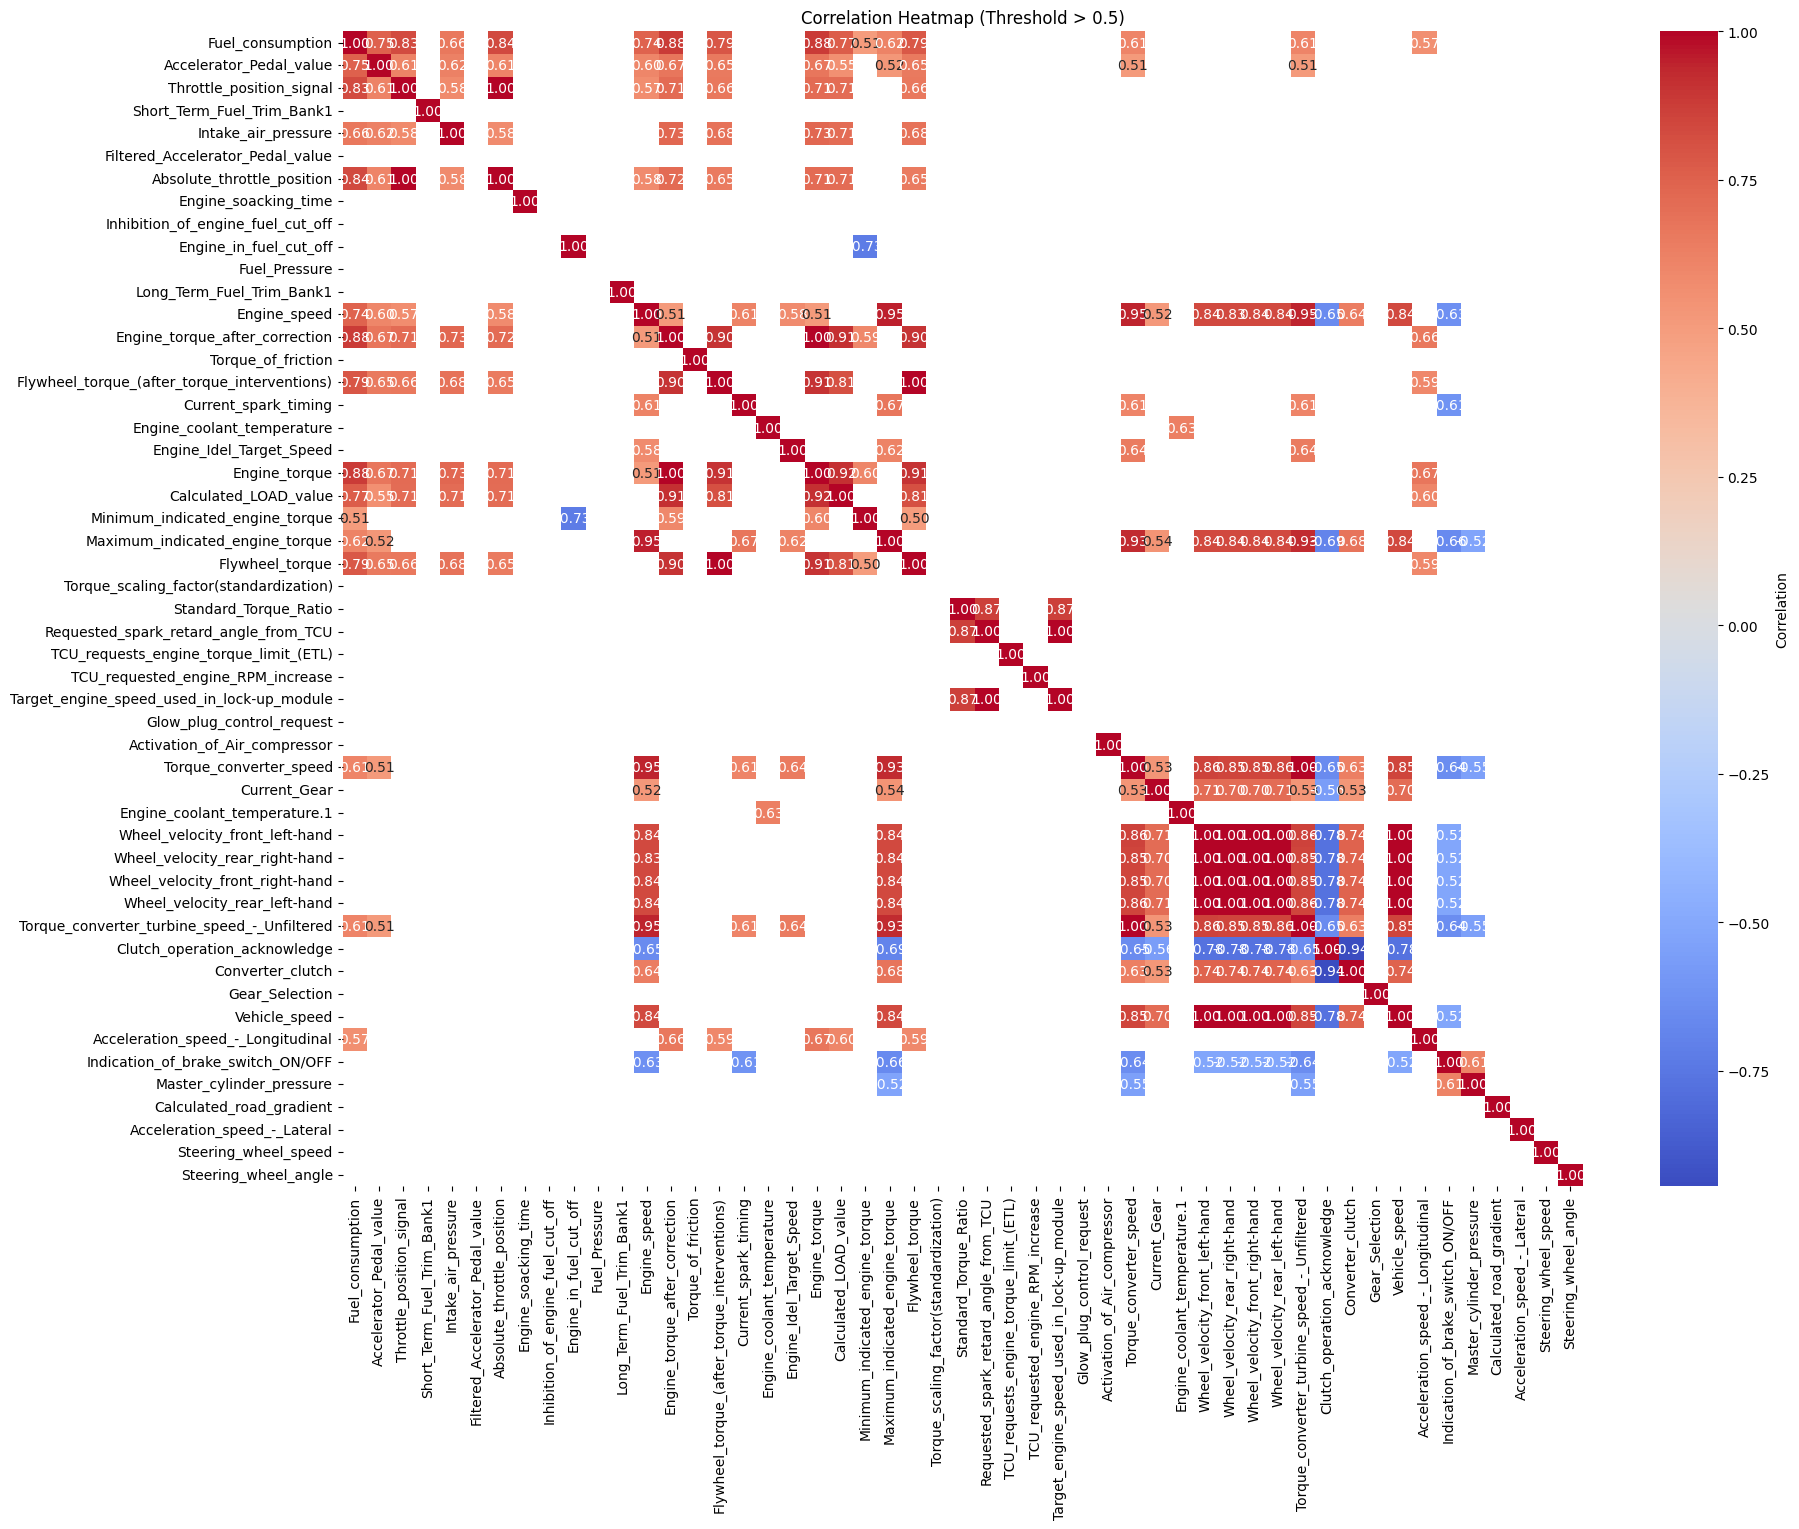

In [8]:
threshold = 0.5

# Calculate the correlation matrix
var = combined_df.corr()

# Mask the correlations below the threshold
mask = abs(var) < threshold

# Create a heatmap with the masked correlations
plt.figure(figsize=(20, 15))
sns.heatmap(var, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title(f'Correlation Heatmap (Threshold > {threshold})')
plt.show()

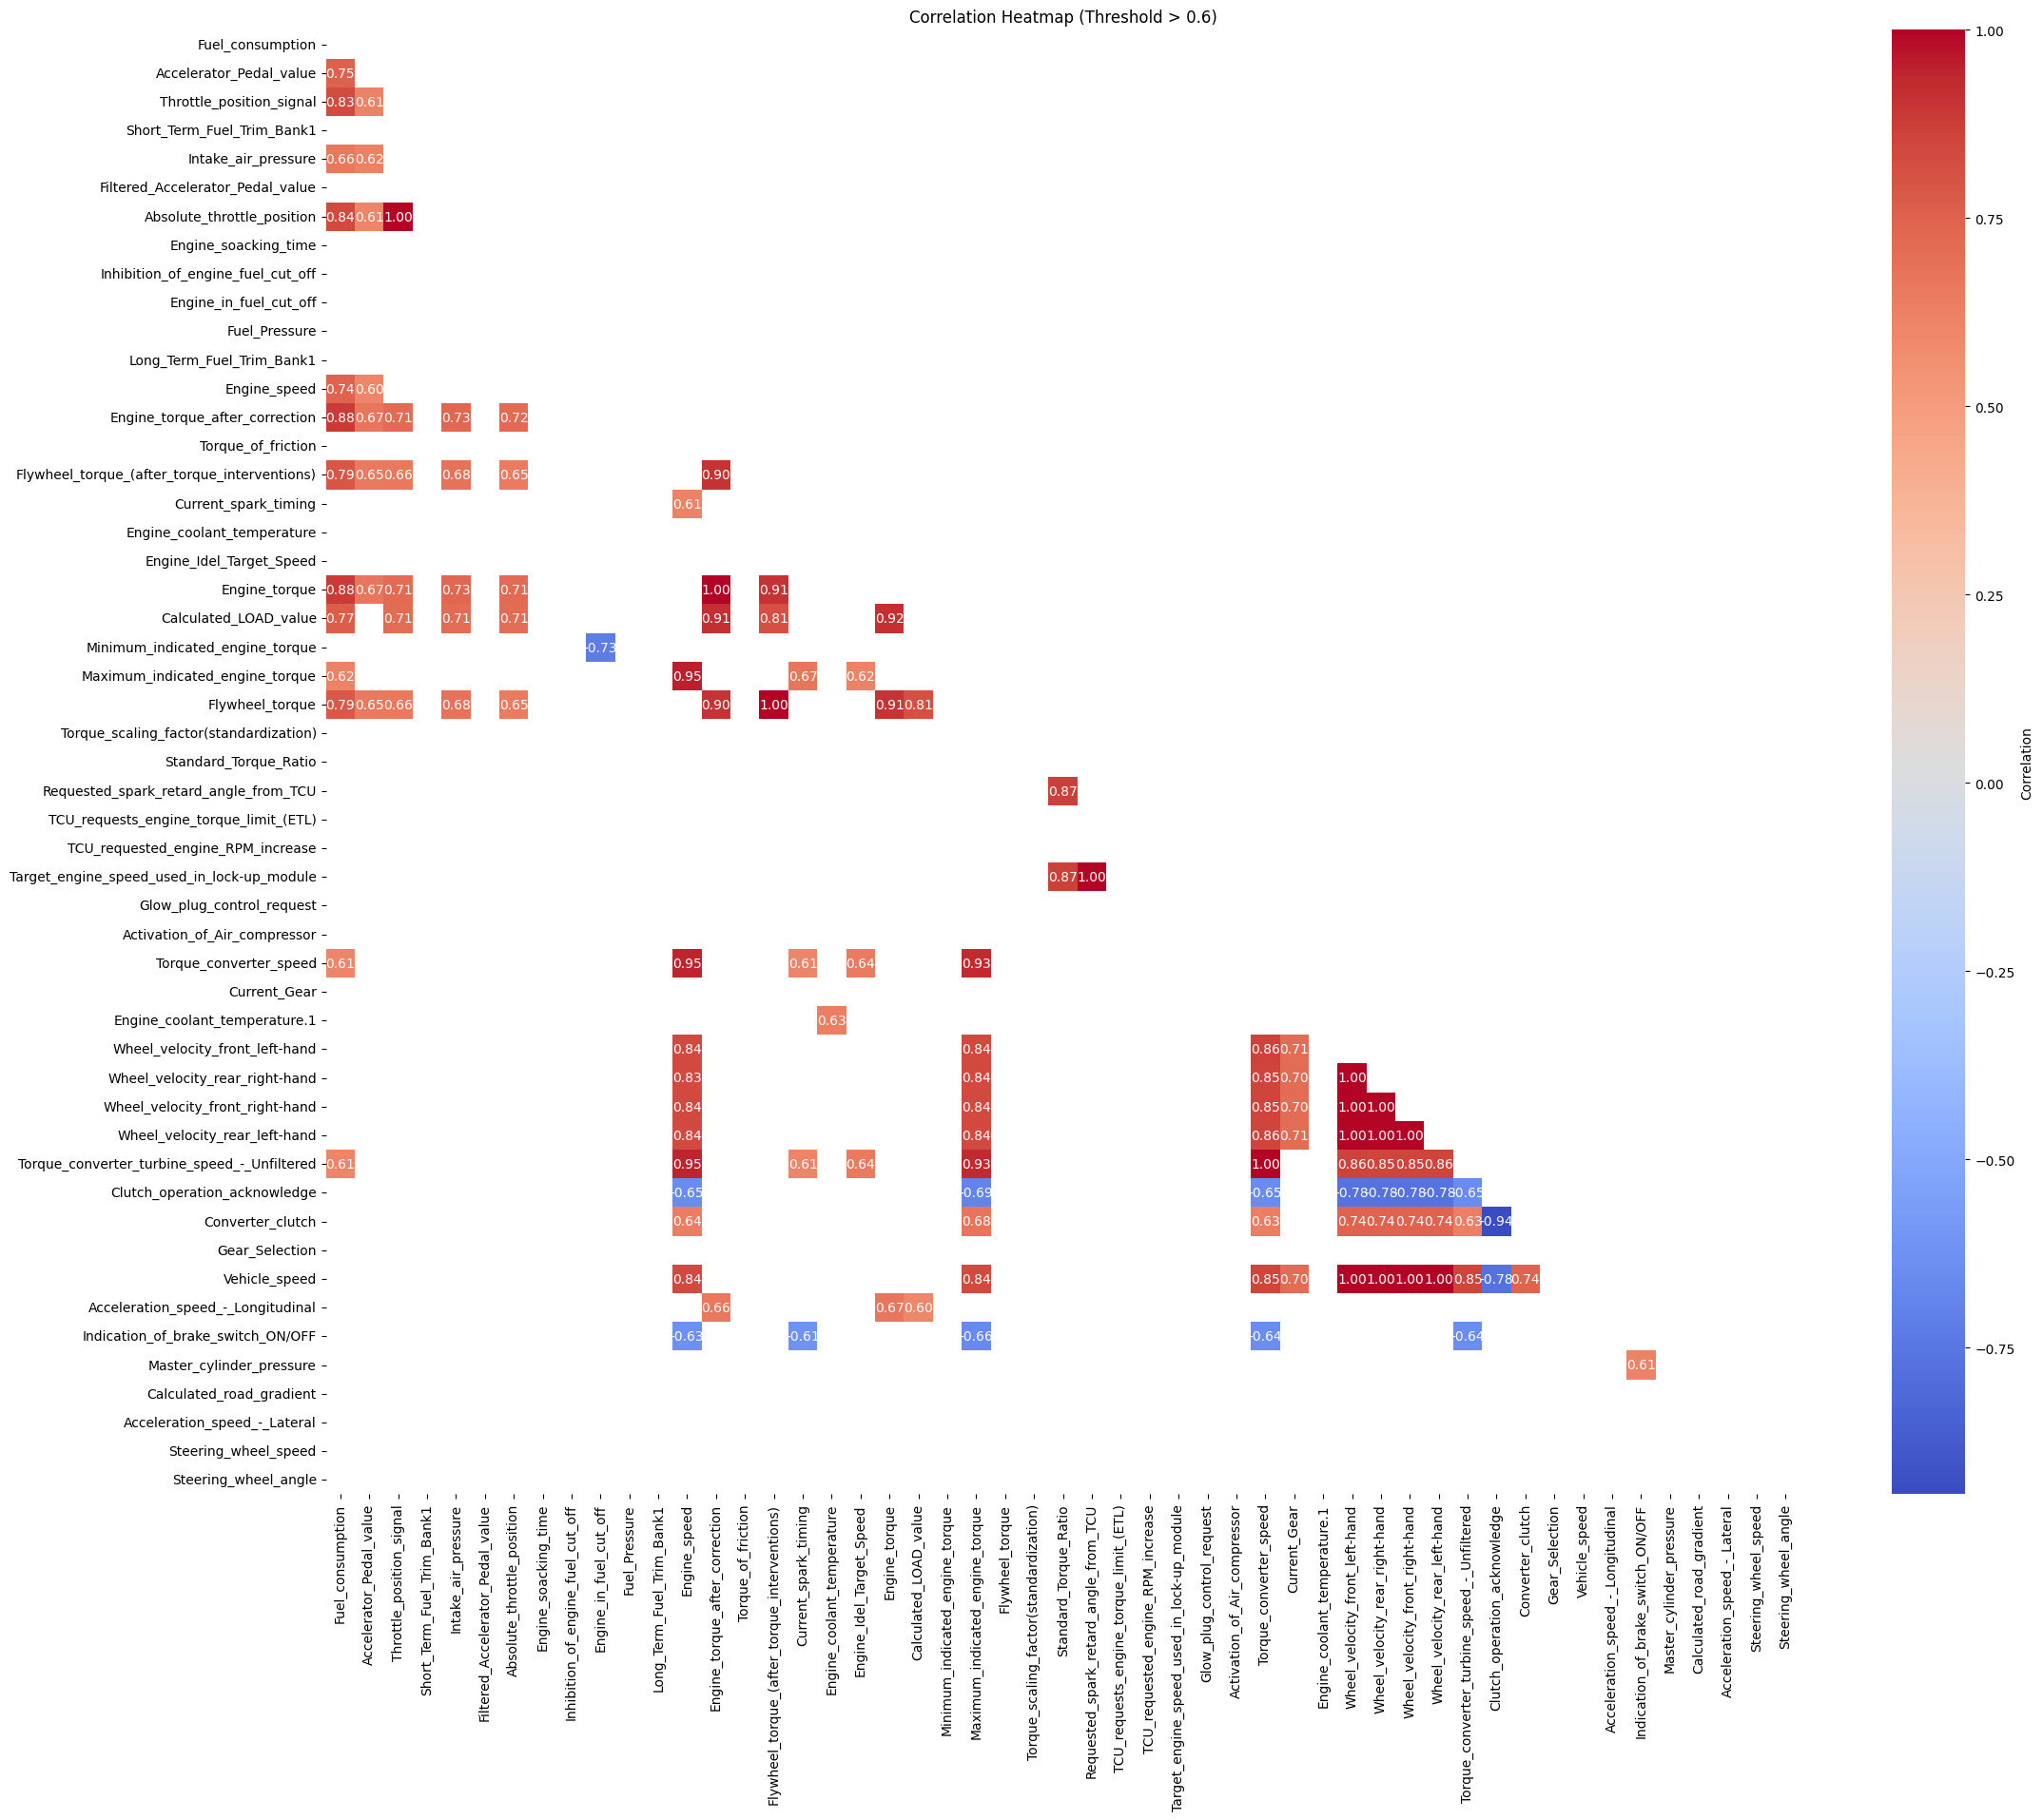

In [9]:
# refer to : https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap


# threshold of corr
threshold = 0.6

# Calculate the correlation matrix
var = combined_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(var, dtype=bool))

# Apply the threshold to mask the lower triangle
mask_lower = np.tril(abs(var) < threshold)

# Combine the masks
mask_combined = mask | mask_lower

# Create a heatmap with the masked correlations
plt.figure(figsize=(25, 20))
sns.heatmap(var, mask=mask_combined, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title(f'Correlation Heatmap (Threshold > {threshold})')
plt.show()

### Insights:
**Columns have highly correlatoin**
 - `Wheel_velocity_rear_right-hand`, `Wheel_velocity_rear_left-hand`, `Wheel_velocity_front_right-hand`, `Wheel_velocity_front_left-hand`, `Vehicle_speed`
 - `Throttle_position_signal`, `Absolute_throttle_position`
 - `Engine_torque_after_correction`, `Engine_torque`
 - `Flywheel_torque_(after_torque_interventions)`, `Flywheel_torque`
 - `Requested_spark_retard_angle_from_TCU`, `Target_engine_speed_used_in_lock-up_module`
 - `Torque_converter_speed`, `Torque_converter_turbine_speed_-_Unfiltered`

## Compare the Features of Highly Correlated for All Drivers

In [10]:
def plot_feature_distributions(df, features):
    fig, axes = plt.subplots(1, len(features), figsize=(20, 5))  # Create a row of subplots

    for i, feature in enumerate(features):
        ax = axes[i]
        df[feature].plot(kind='hist', bins=30, ax=ax, alpha=0.7, color='blue', edgecolor='black')
        df[feature].plot(kind='kde', ax=ax, secondary_y=True, color='red')
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.right_ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

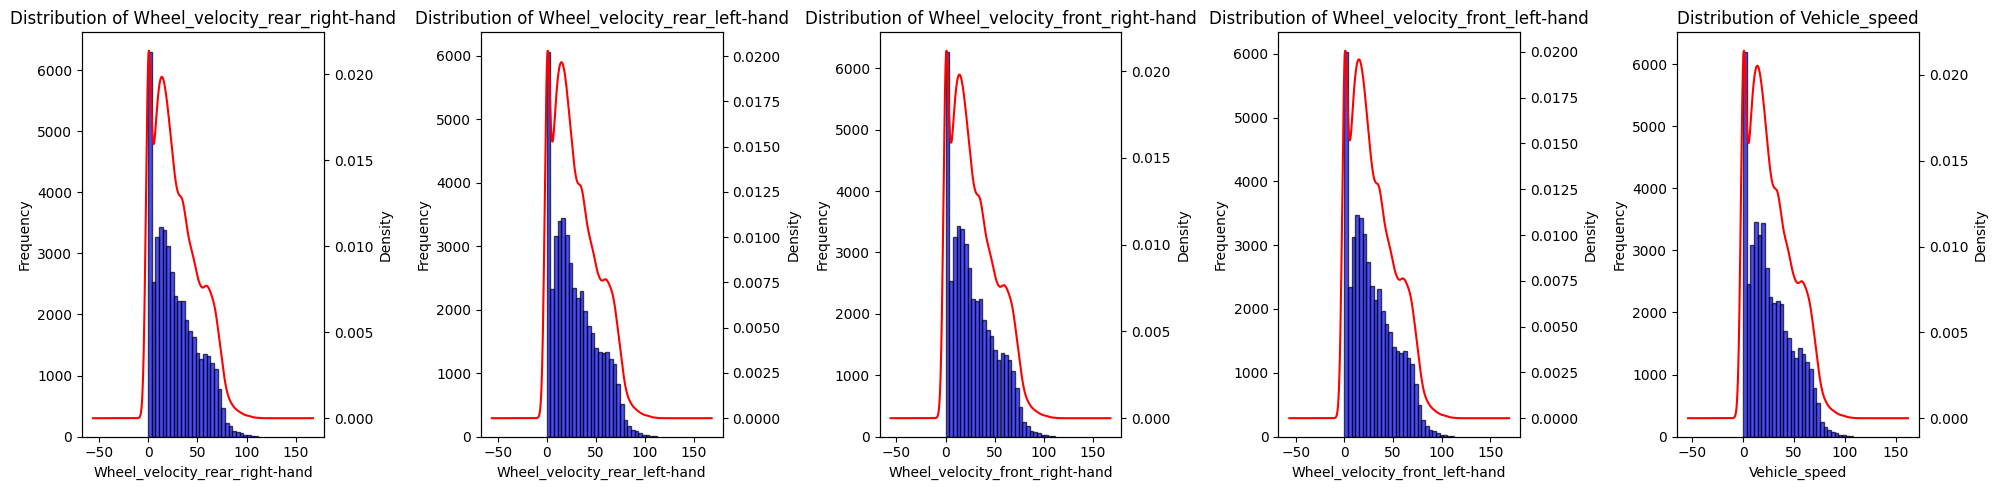

In [11]:
features = ['Wheel_velocity_rear_right-hand', 'Wheel_velocity_rear_left-hand', 'Wheel_velocity_front_right-hand', 'Wheel_velocity_front_left-hand', 'Vehicle_speed']  # Replace with actual feature names
plot_feature_distributions(combined_df, features)

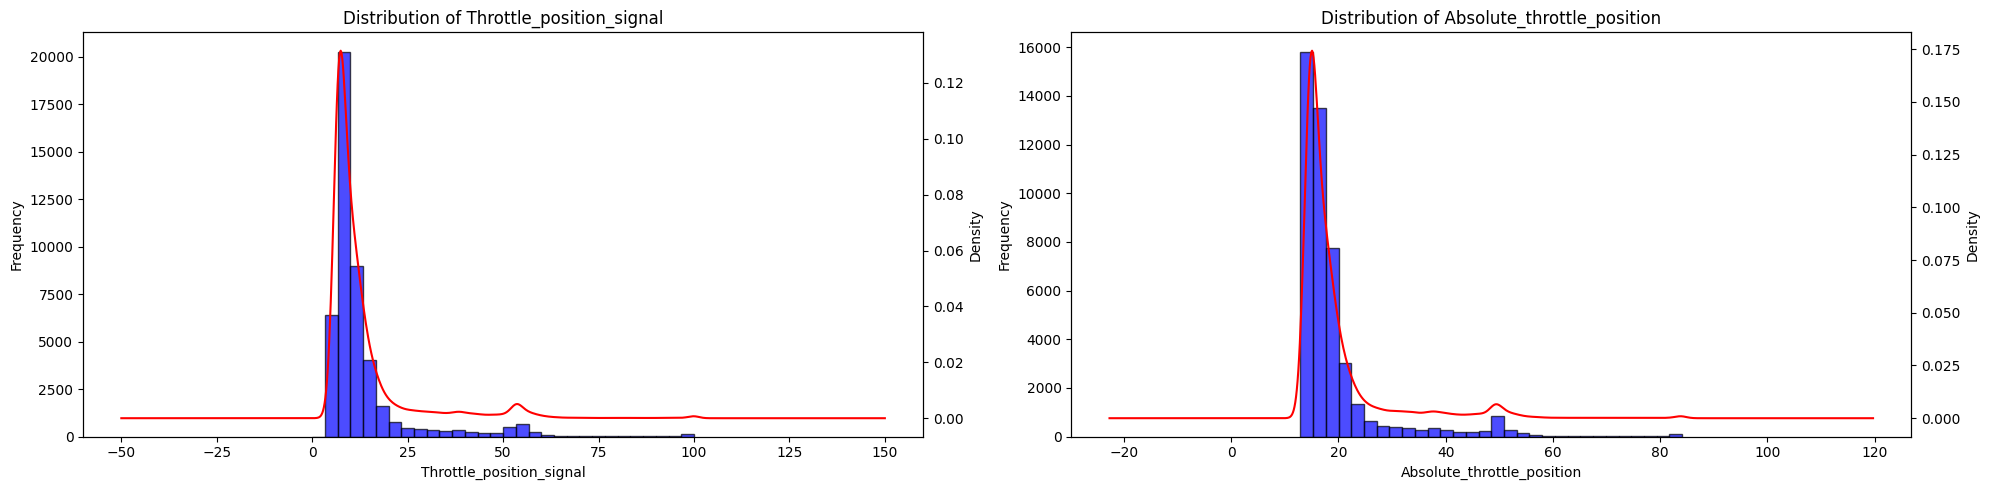

In [12]:
features = ['Throttle_position_signal', 'Absolute_throttle_position']  # Replace with actual feature names
plot_feature_distributions(combined_df, features)

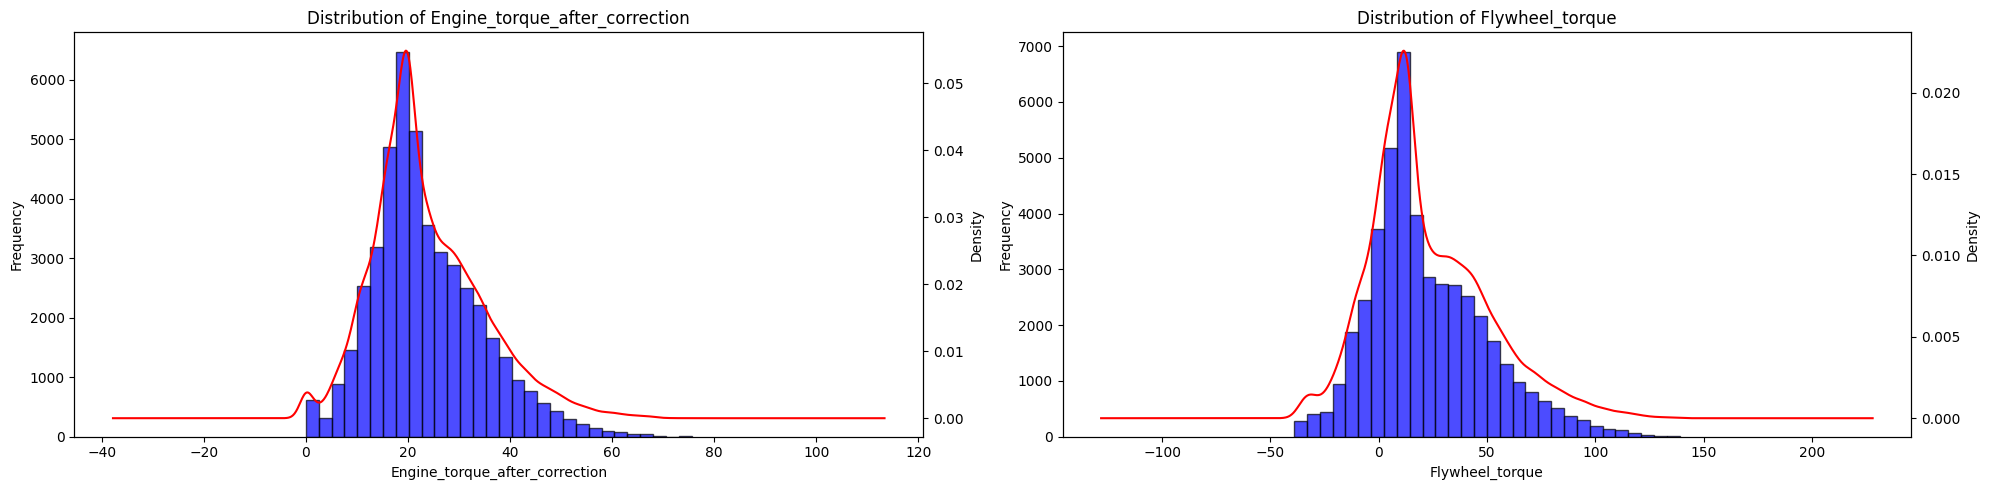

In [13]:
features = ['Engine_torque_after_correction', 'Flywheel_torque']  # Replace with actual feature names
plot_feature_distributions(combined_df, features)

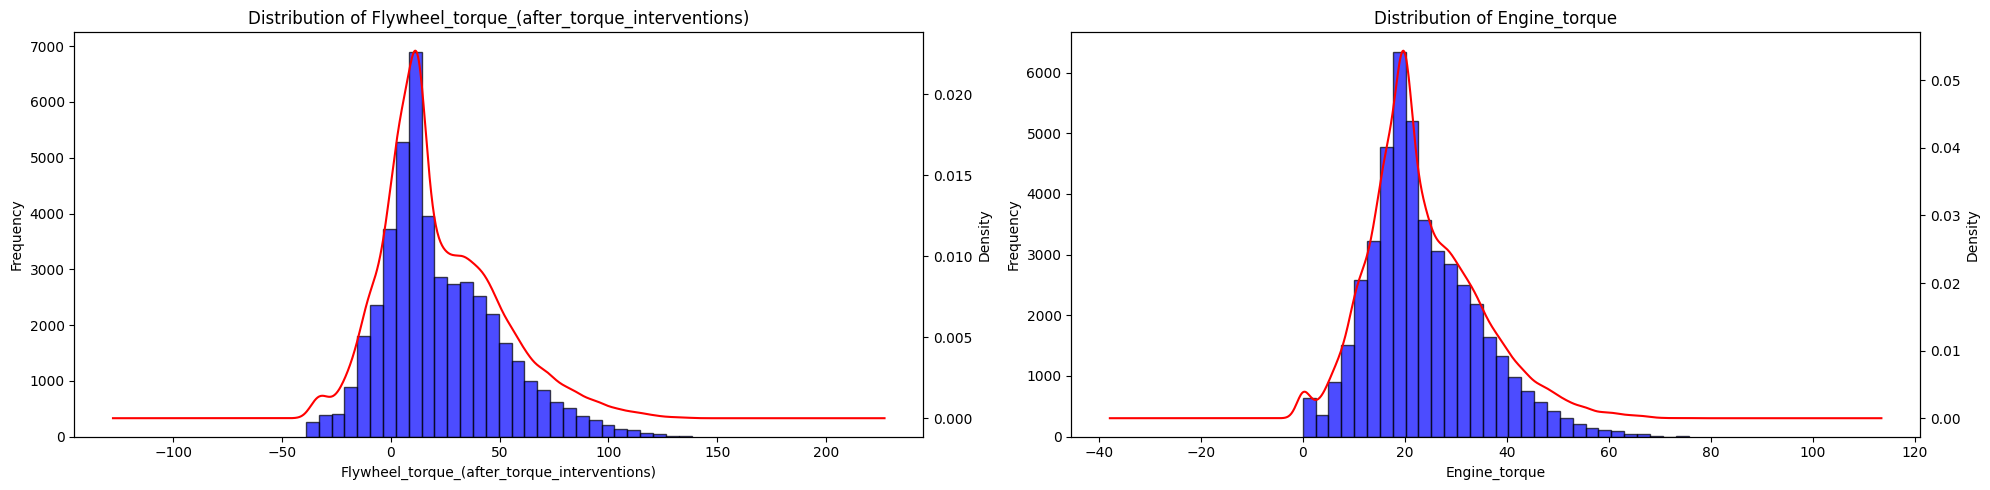

In [14]:
features = ['Flywheel_torque_(after_torque_interventions)', 'Engine_torque']  # Replace with actual feature names
plot_feature_distributions(combined_df, features)

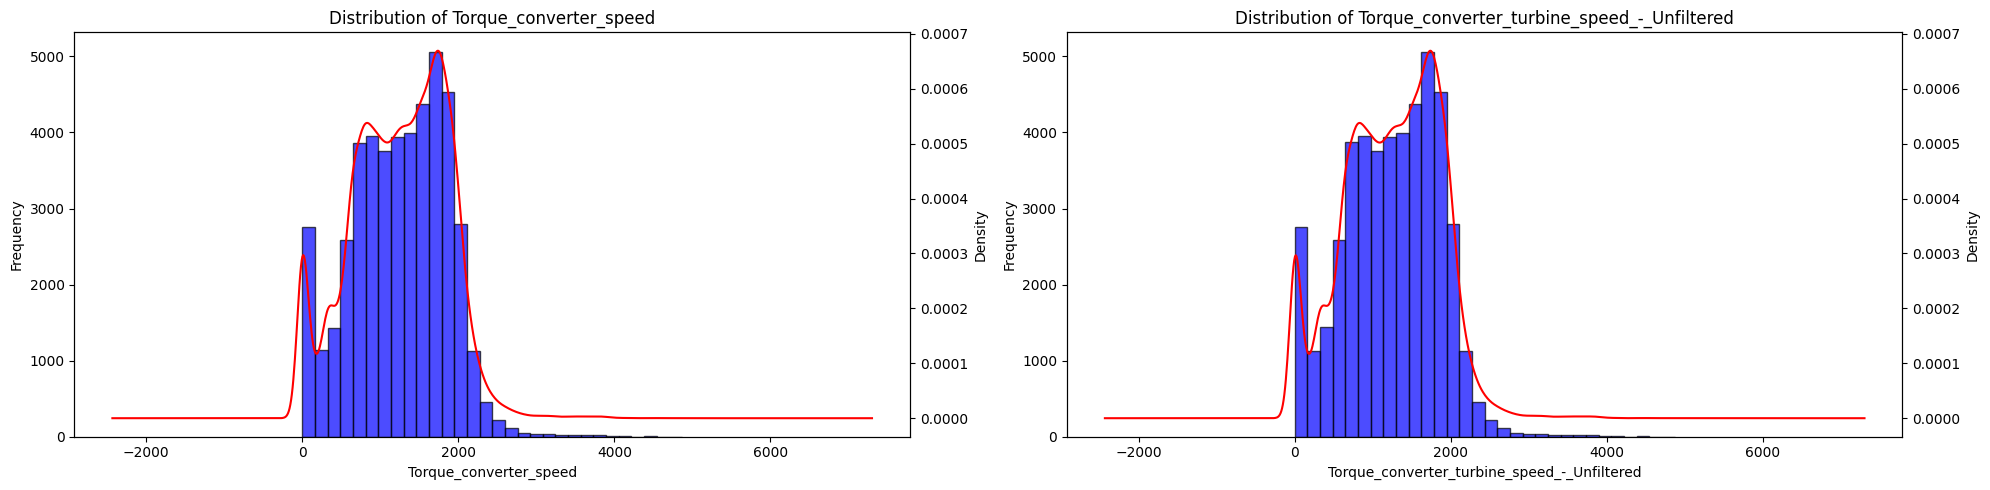

In [15]:
features = ['Torque_converter_speed', 'Torque_converter_turbine_speed_-_Unfiltered']  # Replace with actual feature names
plot_feature_distributions(combined_df, features)

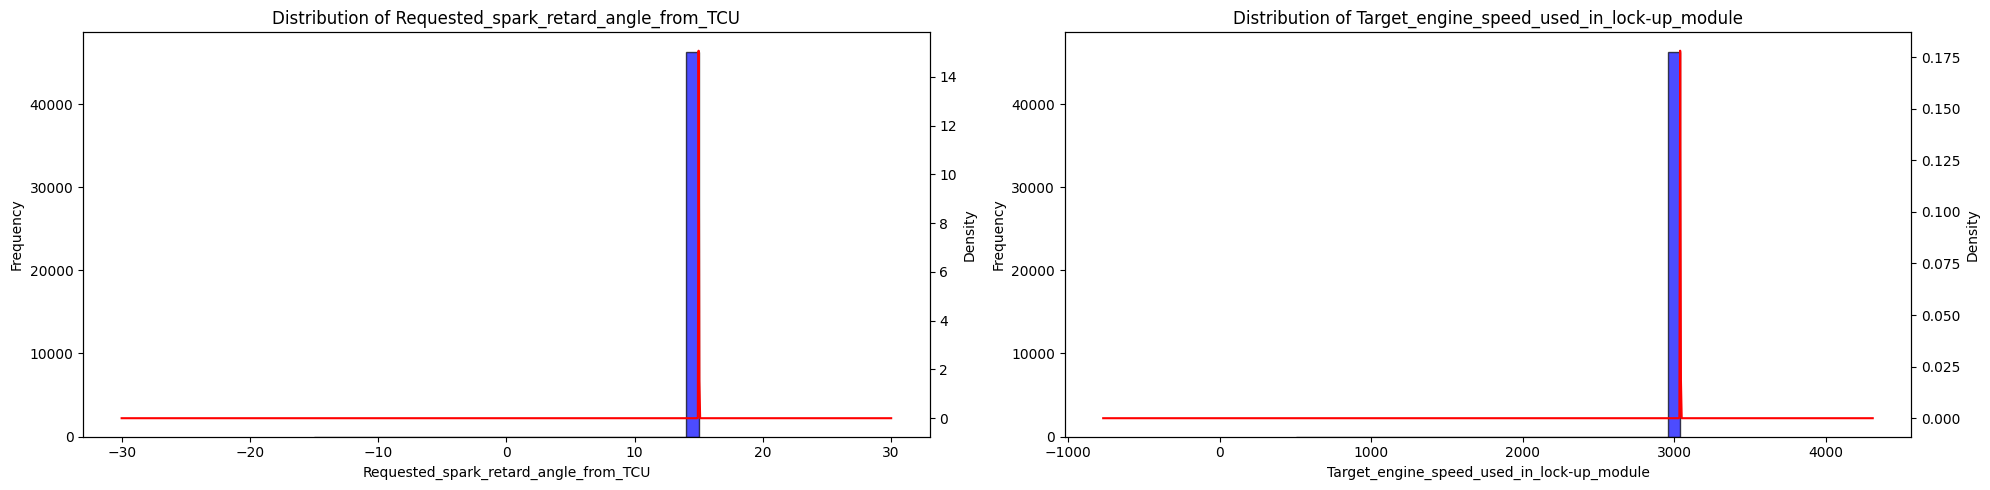

In [16]:
features = ['Requested_spark_retard_angle_from_TCU', 'Target_engine_speed_used_in_lock-up_module']  # Replace with actual feature names
plot_feature_distributions(combined_df, features)

In [17]:
cols_nunique_1 = []
for col in combined_df.columns:
    if combined_df[col].nunique() == 1:
        cols_nunique_1.append(col)

cols_nunique_1

['Filtered_Accelerator_Pedal_value',
 'Inhibition_of_engine_fuel_cut_off',
 'Fuel_Pressure',
 'Torque_scaling_factor(standardization)',
 'Glow_plug_control_request']

## Compare between two pathes

In [18]:
# List to hold individual DataFrames
df_list = []

# Nested loops to process each path and driver
for path in df_copy['PathOrder'].unique():
    for driver in df_copy['Class'].unique():
        df = driverDataframe(df_copy, path, driver)
        df['PathOrder'] = path  # Add PathOrder column back to the DataFrame
        df_list.append(df)

# Concatenate all DataFrames in the list into one master DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

In [19]:
path_1 = combined_df[combined_df['PathOrder'] == 1]
path_2 = combined_df[combined_df['PathOrder'] == 2]

In [20]:

def plot_feature_distributions(df1, df2, feature):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a row with two subplots

    # Plot histogram and KDE for df1
    df1[feature].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black', ax=axes[0], label='df1 histogram')
    df1[feature].plot(kind='kde', color='red', ax=axes[0], secondary_y=True, label='df1 KDE')

    # Plot histogram and KDE for df2
    df2[feature].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black', ax=axes[1], label='df2 histogram')
    df2[feature].plot(kind='kde', color='red', ax=axes[1], secondary_y=True, label='df2 KDE')

    # Set title, labels, and legend for subplot 1
    axes[0].set_title(f'Distribution of {feature} for df1')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency/Density')
    axes[0].legend()

    # Set title, labels, and legend for subplot 2
    axes[1].set_title(f'Distribution of {feature} for df2')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Frequency/Density')
    axes[1].legend()

    plt.tight_layout()  # Adjust layout
    plt.show()

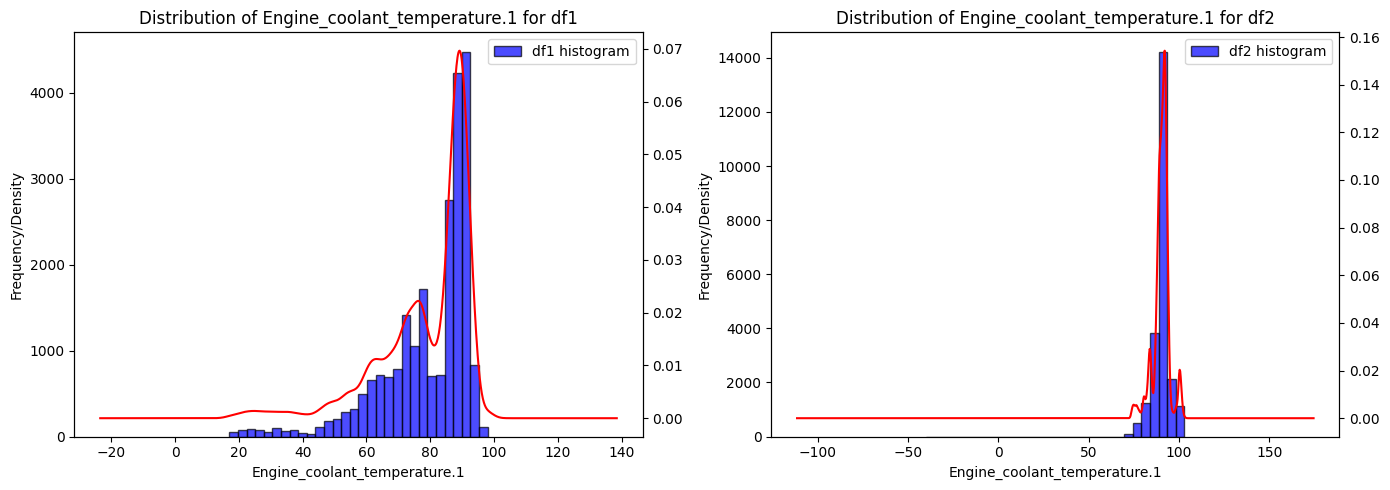

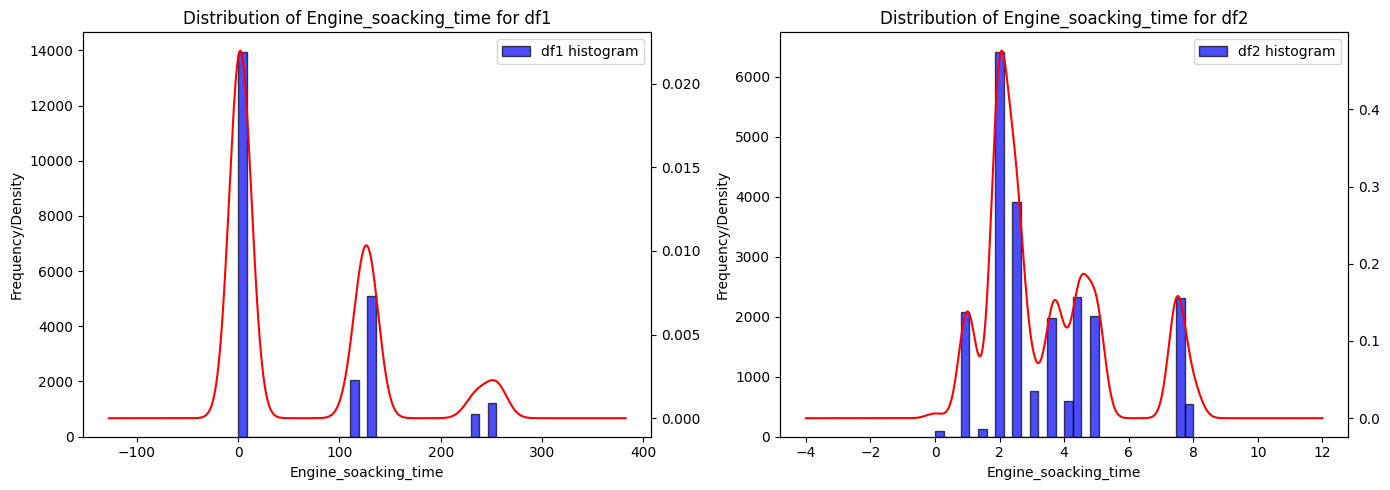

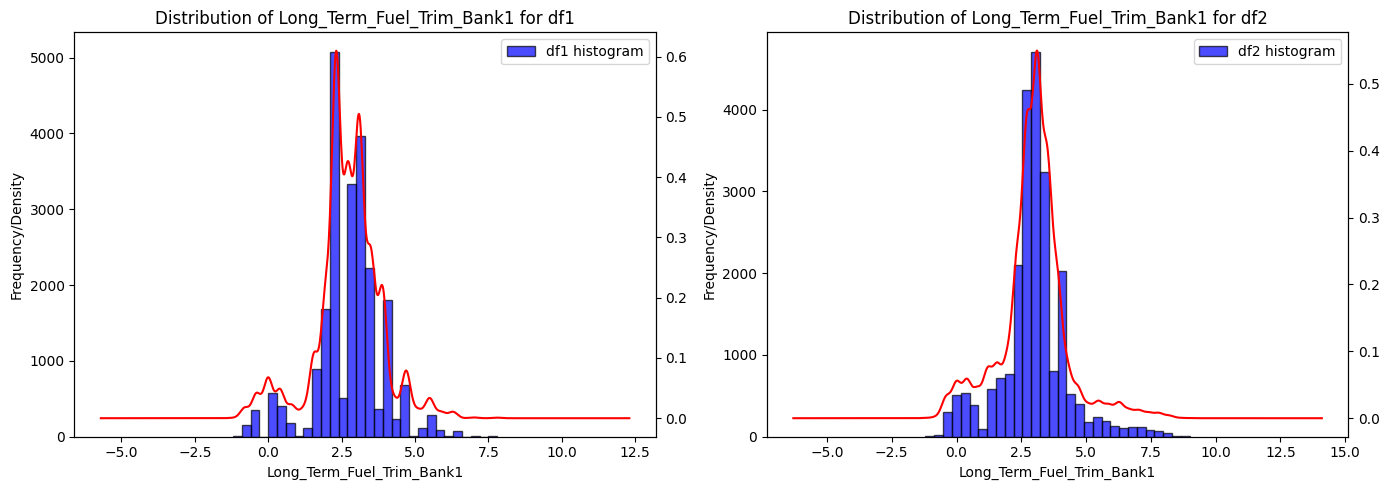

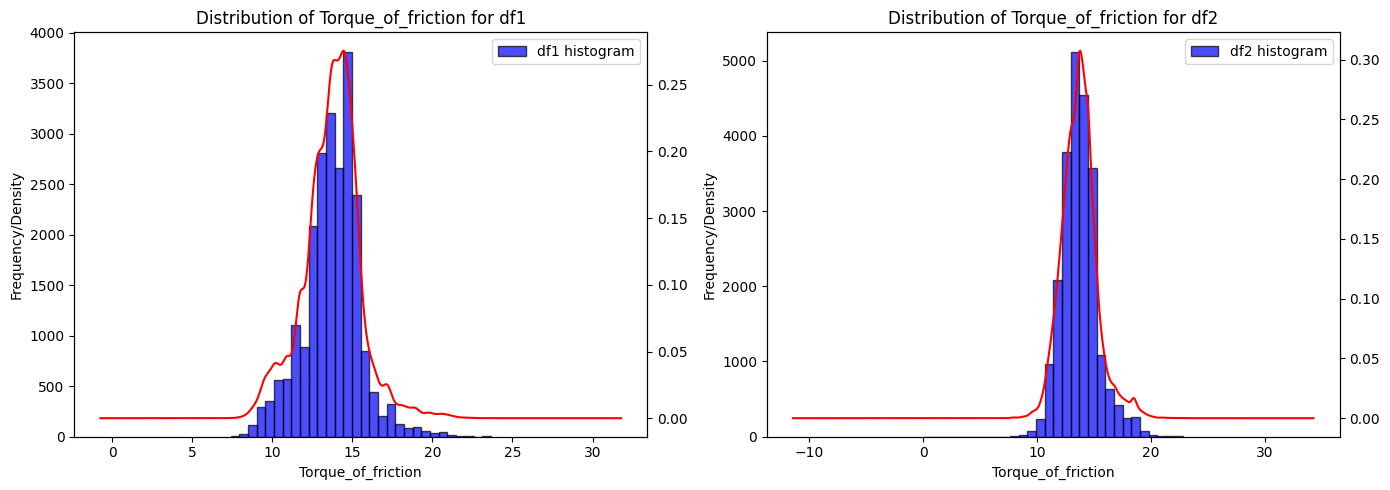

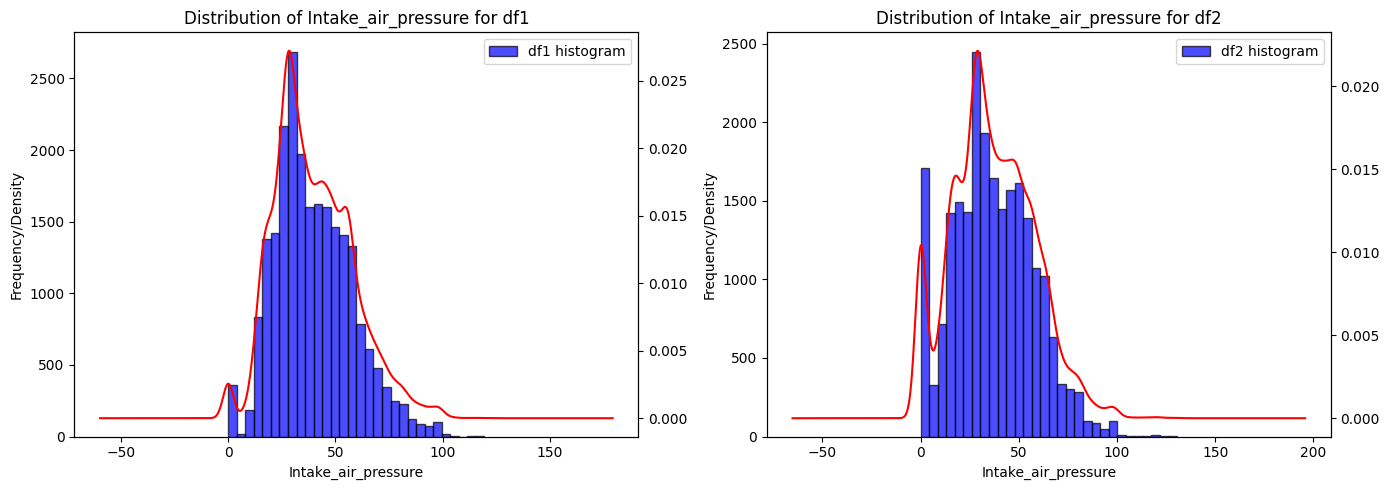

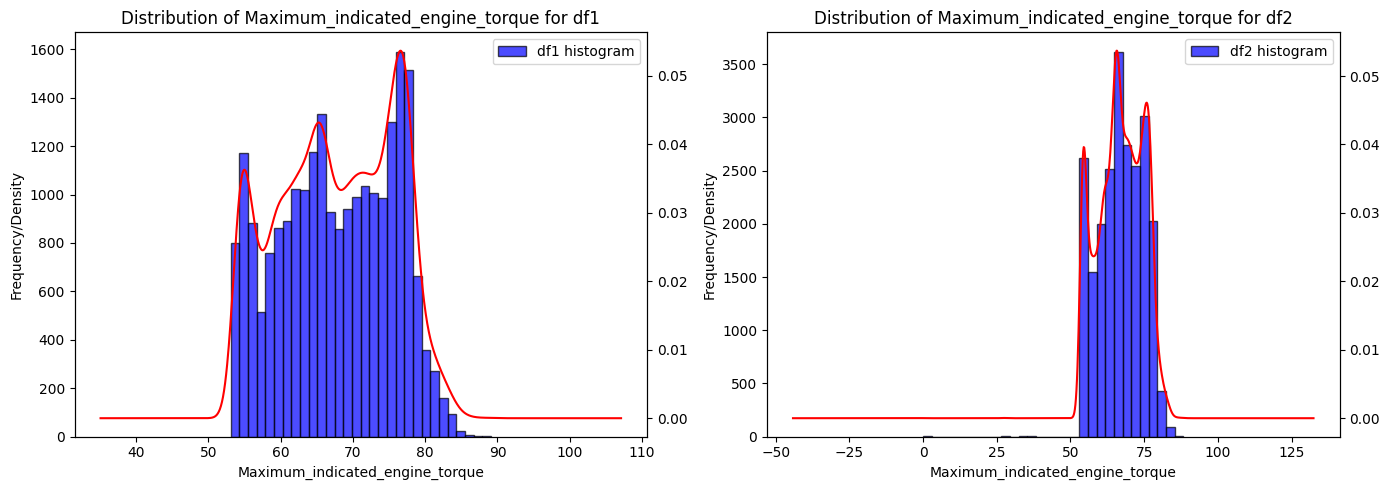

In [21]:
features = ['Engine_coolant_temperature.1', 'Engine_soacking_time', 'Long_Term_Fuel_Trim_Bank1',
            'Torque_of_friction', 'Intake_air_pressure', 'Maximum_indicated_engine_torque']
for feature in features:
    plot_feature_distributions(path_1, path_2, feature)

In [22]:
drop_columns = ['Wheel_velocity_rear_right-hand', 'Wheel_velocity_rear_left-hand', 'Wheel_velocity_front_right-hand',
                'Wheel_velocity_front_left-hand', 'Absolute_throttle_position', 'Flywheel_torque',
               'Flywheel_torque_(after_torque_interventions)', 'Torque_converter_turbine_speed_-_Unfiltered',
               'Filtered_Accelerator_Pedal_value', 'Inhibition_of_engine_fuel_cut_off', 'Fuel_Pressure',
                'Torque_scaling_factor(standardization)', 'Standard_Torque_Ratio', 'Requested_spark_retard_angle_from_TCU',
                'Target_engine_speed_used_in_lock-up_module', 'Glow_plug_control_request']

## Splitting the dataset

In [23]:
## Splitting the dataset
np.random.seed(123)


# get dataframe of driver
def driverDataframe(df, pathOrder, driver):
    driver_df =  df[df['PathOrder'] == pathOrder]
    driver_df = driver_df[driver_df['Class'] == driver]
    driver_df = driver_df.sort_values(by='Time(s)')
    driver_df.drop(columns=['Class', 'PathOrder'], inplace=True)
    driver_df = driver_df.groupby('Time(s)').mean()
    return driver_df


# List to hold individual DataFrames
df_train = []
df_test = []

# drop the unimportant columns
df_copy.drop(columns=drop_columns, inplace=True)

# Nested loops to process each path and driver
for path in df_copy['PathOrder'].unique():
    for driver in df_copy['Class'].unique():
        df = driverDataframe(df_copy, path, driver)
        df['PathOrder'] = path  # Add PathOrder
        df['Class'] = driver    # Add Class

        # Calculate the index to split the data
        split_index = int(0.8 * len(df))

        # Split the data
        df_train_split = df.iloc[:split_index]
        df_test_split = df.iloc[split_index:]

        # Append the data to df_train and df_test lists
        df_train.append(df_train_split)
        df_test.append(df_test_split)

df_train = pd.concat(df_train, ignore_index=True)
df_test = pd.concat(df_test, ignore_index=True)

In [24]:
df_train

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Engine_soacking_time,Engine_in_fuel_cut_off,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,PathOrder,Class
0,595.2,0.00,7.55,0.00,55.0,129.0,0.0,-0.40,974.0,12.90,12.70,-6.35,62.5,870.0,10.35,44.30,2.00,63.65,508.0,0.0,0.0,554.90,0.0,59.5,1.0,0.0,0.0,0.0,-4.25,1.0,166.80,0.00,-8.10,224.0,-0.90,1,A
1,537.6,0.00,6.60,0.00,39.0,129.0,0.0,-0.40,1161.5,6.05,11.70,-3.95,62.5,880.0,6.05,29.05,2.00,65.45,508.0,0.0,0.0,1113.75,0.0,59.5,1.0,0.0,0.0,0.0,-3.95,1.0,165.50,0.00,-4.20,0.0,-1.05,1,A
2,326.4,0.00,5.90,0.00,33.5,129.0,0.0,-0.40,1098.0,6.05,11.30,4.10,62.5,880.0,6.05,24.15,2.00,64.45,508.0,0.0,0.0,1088.65,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.85,0.00,-0.20,0.0,-1.00,1,A
3,268.8,0.00,5.65,0.00,32.0,129.0,0.0,-0.40,995.0,6.65,10.90,6.35,62.5,880.0,6.65,22.75,2.15,62.90,508.0,0.0,0.0,980.00,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.90,0.00,-0.20,0.0,-1.00,1,A
4,275.2,0.00,6.15,0.00,34.5,129.0,0.0,-0.80,947.0,8.00,13.45,6.20,62.5,880.0,8.00,24.50,2.15,62.10,508.0,0.0,1.0,917.65,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.90,0.00,-0.20,0.0,-0.95,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37054,473.6,6.85,8.70,-0.80,54.5,2.5,0.0,5.85,957.5,24.05,11.35,9.55,86.5,720.0,24.05,42.75,2.00,62.30,508.0,0.0,0.5,565.25,1.0,84.0,1.0,0.0,5.0,4.0,0.60,1.5,10.80,0.00,0.05,0.0,8.50,2,E
37055,857.6,9.20,10.80,-0.40,59.5,2.5,0.0,5.45,1340.5,29.90,11.35,12.20,86.5,730.0,29.90,46.45,2.00,68.35,508.0,0.0,0.5,919.25,1.0,84.0,1.0,0.0,5.0,6.0,1.10,1.5,10.80,0.00,0.05,8.0,10.70,2,E
37056,1011.2,9.20,11.30,0.00,59.0,2.5,0.0,5.05,1475.5,29.50,11.35,10.50,86.5,765.0,30.10,46.10,2.15,69.70,508.0,0.0,0.5,1060.75,1.0,84.0,1.0,0.0,5.0,8.5,1.00,1.5,10.80,0.00,0.00,4.0,4.60,2,E
37057,979.2,8.20,11.30,0.75,59.5,2.5,0.0,5.05,1440.5,30.10,11.50,12.90,86.5,825.0,30.10,46.10,2.15,69.30,508.0,0.0,0.5,1022.15,1.5,84.0,0.5,1.0,5.0,10.5,0.90,1.5,14.20,-0.25,0.00,4.0,0.55,2,E


In [25]:
df_test

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Engine_soacking_time,Engine_in_fuel_cut_off,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,PathOrder,Class
0,403.2,0.00,6.85,2.75,60.5,129.0,0.0,0.0,745.0,22.50,15.05,-1.5,86.5,745.0,22.70,50.40,2.0,55.30,508.0,0.0,1.0,283.00,2.0,92.5,1.0,0.0,5.0,4.0,-0.45,2.0,7.40,0.00,-0.25,0.0,-15.65,1,A
1,403.2,0.00,6.85,3.15,61.0,129.0,0.0,0.0,745.5,22.30,15.05,-1.9,86.5,740.0,22.30,50.60,2.0,55.30,508.0,0.0,1.0,289.40,2.0,92.5,1.0,0.0,5.0,3.5,-0.50,2.0,7.75,0.00,-0.20,0.0,-15.85,1,A
2,371.2,0.00,6.60,2.75,58.5,129.0,0.0,-0.4,745.5,20.55,15.20,-3.2,86.5,735.0,20.55,48.05,2.0,55.30,508.0,0.0,1.0,396.50,1.0,92.5,1.0,0.0,5.0,3.0,-0.55,2.0,5.25,5.25,-0.20,2.0,-11.00,1,A
3,352.0,0.00,6.60,1.60,57.0,129.0,0.0,-0.4,731.5,20.75,15.20,-1.7,86.5,730.0,20.75,46.90,2.0,54.90,508.0,0.0,1.0,493.50,1.0,92.5,1.0,0.0,5.0,2.5,-0.05,1.5,1.50,0.00,-0.20,0.0,-7.70,1,A
4,435.2,2.15,7.80,0.80,60.5,129.0,0.0,-0.4,845.5,24.65,15.05,6.2,86.5,770.0,24.65,49.65,2.0,57.05,508.0,0.0,1.0,677.55,1.0,92.5,1.0,0.0,5.0,4.0,0.15,1.5,1.30,0.00,-0.15,4.0,-3.30,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,358.4,0.00,7.10,0.00,59.0,2.0,0.0,6.3,679.0,21.10,14.50,-4.9,85.0,670.0,21.10,47.80,2.0,56.60,508.0,0.0,1.0,0.00,1.0,84.0,1.0,0.0,5.0,0.0,0.00,2.0,51.90,0.00,-0.10,0.0,10.60,2,E
9273,358.4,0.00,7.10,-0.80,58.0,2.0,0.0,6.3,678.0,21.10,14.80,-3.0,85.0,670.0,21.10,45.90,2.0,56.60,508.0,0.0,1.0,0.00,0.0,84.0,1.0,0.0,14.0,0.0,0.00,2.0,56.20,0.00,-0.10,0.0,10.70,2,E
9274,332.8,0.00,6.60,-1.60,56.0,2.0,0.0,6.3,674.0,19.10,14.50,-5.3,85.0,670.0,19.10,44.70,2.0,56.60,508.0,0.0,1.0,299.80,0.0,84.0,1.0,0.0,0.0,0.0,0.00,2.0,56.20,0.00,-0.10,0.0,10.80,2,E
9275,307.2,0.00,6.10,-2.30,51.0,2.0,0.0,7.0,673.0,17.60,15.20,-2.6,86.0,670.0,17.60,39.60,2.0,56.60,508.0,0.0,1.0,651.00,0.0,84.0,1.0,0.0,0.0,0.0,0.00,2.0,54.90,0.00,-0.10,0.0,10.60,2,E


 - `Calculated_LOAD_value`, `Intake_air_pressure`
 - `Engine_speed`, `Torque_converter_turbine_speed_-_Unfiltered`
 -  `Engine_torque`, `Calculated_LOAD_value`

In [26]:
# cols_nunique_1 = []
# for col in cols_less_5:
#     if driver_A[col].nunique() > 1:
#         plt.figure()
#         rcParams['figure.figsize'] = (6, 4)
#         plt.gca().set(xlabel=col, ylabel='Count')
#         sns.countplot(x=col, palette='Blues', data=driver_A)
#         print('*'*40 + col + '*'*40)
#         print(f'Unique Number: {driver_A[col].unique()}')
#         print(driver_A[col].describe())
#         plt.show();
#         print('*' * 100)
#     else:
#         cols_nunique_1.append(col)

# Normalization

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [27]:
X_train = df_train.drop(columns=['Class'])
y_train = df_train['Class']
X_test = df_test.drop(columns=['Class'])
y_test = df_test['Class']

In [28]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# KNN

In [29]:
# pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.3 MB/s eta 0:00:00


In [36]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy}')


KNN Accuracy: 0.4394739678775466


In [38]:
def objective(trial):
    # Define the hyperparameters to optimize
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])

    # Create KNN classifier with the suggested hyperparameters
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict on the test set
    knn_predictions = knn.predict(X_test)

    # Calculate the accuracy as the objective metric
    accuracy = accuracy_score(y_test, knn_predictions)

    return accuracy

# Set up Optuna to optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters found by Optuna
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Train KNN with the best hyperparameters found
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Evaluate on test set with the best model
best_knn_predictions = best_knn.predict(X_test)
best_knn_accuracy = accuracy_score(y_test, best_knn_predictions)
print(f'Best KNN Accuracy: {best_knn_accuracy}')


[I 2024-06-14 14:47:19,113] A new study created in memory with name: no-name-fe43dc82-5813-49f5-a8cd-a61b0e28a985
[I 2024-06-14 14:47:21,183] Trial 0 finished with value: 0.44055190255470517 and parameters: {'n_neighbors': 4, 'weights': 'uniform'}. Best is trial 0 with value: 0.44055190255470517.
[I 2024-06-14 14:47:23,157] Trial 1 finished with value: 0.43106607739570985 and parameters: {'n_neighbors': 20, 'weights': 'uniform'}. Best is trial 0 with value: 0.44055190255470517.
[I 2024-06-14 14:47:25,659] Trial 2 finished with value: 0.445187021666487 and parameters: {'n_neighbors': 2, 'weights': 'uniform'}. Best is trial 2 with value: 0.445187021666487.
[I 2024-06-14 14:47:28,392] Trial 3 finished with value: 0.4335453271531745 and parameters: {'n_neighbors': 13, 'weights': 'distance'}. Best is trial 2 with value: 0.445187021666487.
[I 2024-06-14 14:47:30,000] Trial 4 finished with value: 0.4335453271531745 and parameters: {'n_neighbors': 13, 'weights': 'distance'}. Best is trial 2 wi

Best hyperparameters: {'n_neighbors': 2, 'weights': 'uniform'}
Best KNN Accuracy: 0.445187021666487


# XGboost

In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}')

XGBoost Accuracy: 0.8609464266465452


In [43]:
def objective(trial):
    param = {
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }

    xgb = XGBClassifier(**param)
    xgb.fit(X_train, y_train)
    xgb_predictions = xgb.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)

    return xgb_accuracy

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print(f"Best hyperparameters: {study.best_params}")

# Train the final model using the best hyperparameters
best_params = study.best_params
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)
xgb_best_predictions = xgb_best.predict(X_test)
xgb_best_accuracy = accuracy_score(y_test, xgb_best_predictions)
print(f'Optimized XGBoost Accuracy: {xgb_best_accuracy}')

[I 2024-06-14 15:30:21,086] A new study created in memory with name: no-name-be74f708-c7ff-4137-8e6b-87336ceee007
[I 2024-06-14 15:30:52,480] Trial 0 finished with value: 0.8443462326183033 and parameters: {'max_depth': 7, 'learning_rate': 0.03101196559607158, 'n_estimators': 798, 'gamma': 0.27110437570415447, 'min_child_weight': 1.1077876525082307e-06, 'subsample': 0.8659863785232582, 'colsample_bytree': 0.9373857888787591, 'reg_alpha': 0.1452469375248372, 'reg_lambda': 5.710681557024917e-05}. Best is trial 0 with value: 0.8443462326183033.
[I 2024-06-14 15:31:08,018] Trial 1 finished with value: 0.8643958176134526 and parameters: {'max_depth': 3, 'learning_rate': 0.23735312139348402, 'n_estimators': 495, 'gamma': 0.003130874656914618, 'min_child_weight': 0.0006871816674936107, 'subsample': 0.9750200427358091, 'colsample_bytree': 0.721213980831769, 'reg_alpha': 0.026405494820707184, 'reg_lambda': 8.487416118326854e-06}. Best is trial 1 with value: 0.8643958176134526.
[I 2024-06-14 15:

Best hyperparameters: {'max_depth': 6, 'learning_rate': 0.20849918935778394, 'n_estimators': 724, 'gamma': 1.0463646974280612e-07, 'min_child_weight': 0.0013945335328693258, 'subsample': 0.9167165019409806, 'colsample_bytree': 0.7809014810374282, 'reg_alpha': 8.411127980030019e-06, 'reg_lambda': 0.0013558141851942958}
Optimized XGBoost Accuracy: 0.8869246523660667
